In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from keras.layers import Input, Convolution2D, MaxPooling2D
from keras.layers.core import Activation
from keras.activations import relu
from keras.models import Sequential, Graph, Model
from convauto.layers import UnPool2D, ConvolutionalTranspose2D
from convauto.datasets import MNIST, STL10
from convauto.objectives import l2_loss
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## MNIST Test

In [3]:
# load mnist
(X_train, y_train), (X_test, y_test) = MNIST.load_mnist()

In [4]:
mnist_model = Graph()
mnist_model.add_input(name='input', input_shape=[1,28,28])

# Encoder
conv_0 = Convolution2D(64,5,5, border_mode='same', activation='relu')
mnist_model.add_node(conv_0, name='conv_0', input='input')
mp_0 = MaxPooling2D(border_mode='same')
mnist_model.add_node(mp_0, name='mp_0', input='conv_0')
conv_1 = Convolution2D(16,3,3, border_mode='same', activation='relu')
mnist_model.add_node(conv_1, name='conv_1', input='mp_0')
mp_1 = MaxPooling2D(border_mode='same')
mnist_model.add_node(mp_1, name='mp_1', input='conv_1')

# Decoder
up_1 = UnPool2D(mp_1)
mnist_model.add_node(up_1, name='up_1', input='mp_1')
convT_1 = ConvolutionalTranspose2D(conv_1)
mnist_model.add_node(convT_1, name='convT_1', input='up_1')
convT_1.set_output_shape()
up_0 = UnPool2D(mp_0)
mnist_model.add_node(up_0, name='up_0', input='convT_1')
convT_0 = ConvolutionalTranspose2D(conv_0)
mnist_model.add_node(convT_0, name='convT_0', input='up_0')
convT_0.set_output_shape()

mnist_model.add_output(name='reconstruction', input='convT_0')

mnist_model.compile(optimizer='rmsprop', loss=l2_loss)

In [5]:
mnist_model.fit({'input':X_train, 'reconstruction':X_train}, nb_epoch=1)

Epoch 1/1
60000/60000 [==============================] - 131s - loss: 47.4446   


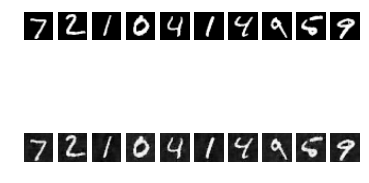

In [11]:
x_hat = mnist_model.predict({'input':X_test[:10]})['reconstruction']

for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap='Greys_r')
    plt.axis('off')
    plt.subplot(2,10,i+11)
    plt.imshow(x_hat[i].reshape((28,28)),cmap='Greys_r')
    plt.axis('off')

## STL10

In [12]:
x_train, y_train = STL10.load_unlabeled()
x_train.shape

(100000, 3, 96, 96)

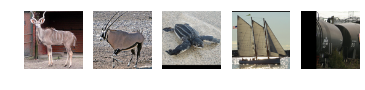

In [13]:
for i in range(5):
    plt.subplot(1,5,i+1)
    image = np.transpose(x_train[i], (2, 1, 0))
    plt.imshow(image)
    plt.axis('off')

In [15]:
stl10_model = Graph()
stl10_model.add_input(name='input', input_shape=[3,96,96])

# Encoder
conv_0 = Convolution2D(64,3,3, border_mode='same', activation='relu')
stl10_model.add_node(conv_0, name='conv_0', input='input')
mp_0 = MaxPooling2D(border_mode='same')
stl10_model.add_node(mp_0, name='mp_0', input='conv_0')
conv_1 = Convolution2D(64,3,3, border_mode='same', activation='relu')
stl10_model.add_node(conv_1, name='conv_1', input='mp_0')
mp_1 = MaxPooling2D(border_mode='same')
stl10_model.add_node(mp_1, name='mp_1', input='conv_1')

# Decoder
up_1 = UnPool2D(mp_1)
stl10_model.add_node(up_1, name='up_1', input='mp_1')
convT_1 = ConvolutionalTranspose2D(conv_1)
stl10_model.add_node(convT_1, name='convT_1', input='up_1')
convT_1.set_output_shape()
up_0 = UnPool2D(mp_0)
stl10_model.add_node(up_0, name='up_0', input='convT_1')
convT_0 = ConvolutionalTranspose2D(conv_0)
stl10_model.add_node(convT_0, name='convT_0', input='up_0')
convT_0.set_output_shape()

stl10_model.add_output(name='reconstruction', input='convT_0')

stl10_model.compile(optimizer='rmsprop', loss=l2_loss)

In [ ]:
stl10_model.fit({'input':x_train[:10000], 'reconstruction':x_train[:10000]}, nb_epoch=1)

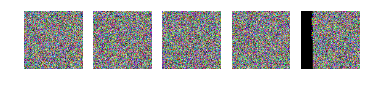

In [17]:
x_hat = stl10_model.predict({'input':x_train[:5]})['reconstruction']
for i in range(5):
    plt.subplot(1,5,i+1)
    image = np.transpose(x_hat[i], (2, 1, 0))
    plt.imshow(image)
    plt.axis('off')

(-0.5, 95.5, 95.5, -0.5)

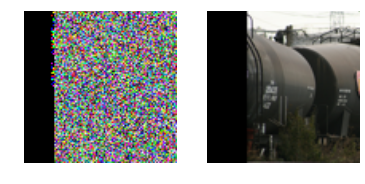

In [18]:
plt.subplot(1,2,1)
image = np.transpose(x_hat[4], (2, 1, 0))
plt.imshow(image)
plt.axis('off')
plt.subplot(1,2,2)
image = np.transpose(x_train[4], (2, 1, 0))
plt.imshow(image)
plt.axis('off')

## Joint Loss

In [ ]:
joint_model = Graph()
joint_model.add_input(name='input', input_shape=[1,28,28])

# Encoder
conv_0 = Convolution2D(64,5,5, border_mode='same', activation='relu')
joint_model.add_node(conv_0, name='conv_0', input='input')
mp_0 = MaxPooling2D(border_mode='same')
joint_model.add_node(mp_0, name='mp_0', input='conv_0')
conv_1 = Convolution2D(16,3,3, border_mode='same', activation='relu')
joint_model.add_node(conv_1, name='conv_1', input='mp_0')
mp_1 = MaxPooling2D(border_mode='same')
joint_model.add_node(mp_1, name='mp_1', input='conv_1')

# Decoder
up_1 = UnPool2D(mp_1)
joint_model.add_node(up_1, name='up_1', input='mp_1')
convT_1 = ConvolutionalTranspose2D(conv_1)
joint_model.add_node(convT_1, name='convT_1', input='up_1')
convT_1.set_output_shape()
up_0 = UnPool2D(mp_0)
joint_model.add_node(up_0, name='up_0', input='convT_1')
convT_0 = ConvolutionalTranspose2D(conv_0)
joint_model.add_node(convT_0, name='convT_0', input='up_0')
convT_0.set_output_shape()

joint_model.add_output(name='reconstruction', input='convT_0')

joint_model.compile(optimizer='rmsprop', loss=l2_loss)
joint_model.summary()

In [ ]:
joint_model.fit({'input':X_train, 'reconstruction':X_train}, nb_epoch=1)

In [ ]:
x_hat = joint_model.predict({'input':X_test[:5]})['reconstruction']

for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape((28,28)),cmap='Greys_r')
    plt.axis('off')
    plt.subplot(2,5,i+6)
    plt.imshow(x_hat[i].reshape((28,28)),cmap='Greys_r')
    plt.axis('off')